# nmi | spring 2024
## demo 05 | interpolation


### q1 interpolating function

find polynomial that passes through points $(0,1),(2,3),(3,0)$.
</br>


#### (a) (10 pts) use lagrange interpolation or newtons divided difference.


#### (b) (5 pts) calculate the upper bound for interpolation error at $x=1$.


### q2 chebyshev interpolation

<b><font color=red>this is a code question.</font></b>
</br></br>

find interpolating function $P_{10}(x)$ that approximates $f(x) = \frac{1}{1+12x^2}$ over the interval $[-1,1]$ with number of data points sampled $n = 11$.
</br></br>

<b>wednesdays lab will include similar workflow for this question. the quick extra credit on blackboard is a basic introduction to plots in python.</b>
</br>


#### common code


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import polynomial as npp
import scipy as sp

# function to approximate
f = lambda x: 1/np.exp(pow(x,2)) # demo function; obviously its not homework function

# interval
x = [-1,1]


In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

#coeffs = divided_diff(xn,yn)[0,:]
#ps_std = newton_poly(coeffs,xn,xall)


#### (a) (5 pts) express $P_{10}(x)$ as standard monomial using evenly spaced data points.



In [ ]:
n = 11 # points, including both endpoints
xs_esp = np.linspace(x[0],x[1],n) # evenly spaced
ys_esp = f(xs_esp)

p_std = sp.interpolate.lagrange(xs_esp,ys_esp)
print(f"\nstandard monomial:\n\n{p_std}\n") # meh print



standard monomial:

           10             9           8             7          6
-0.005827 x  + 1.104e-12 x + 0.03992 x + 1.095e-12 x - 0.1662 x
              5          4             3     2
 - 1.179e-12 x + 0.4999 x + 2.008e-14 x - 1 x + 1.9e-15 x + 1



#### (b) (10 pts) express $P_{10}(x)$ with chebyshev basis using chebyshev nodes.


In [ ]:
xs_rts = npp.chebyshev.chebpts2(n) # chebyshev roots
ys_rts = f(xs_rts) # np.exp(xs) # system ~ truth
p_che = npp.chebyshev.Chebyshev.fit(xs_rts,ys_rts,deg=n-1)
print(f"\nchebyshev polynomial:\n\n{p_che}\n") # pretty print



chebyshev polynomial:

0.64503527 + 0.0·T₁(x) - 0.31284161·T₂(x) + (5.18203038e-17)·T₃(x) +
0.03870412·T₄(x) + (6.72438947e-17)·T₅(x) - 0.0032087·T₆(x) -
(7.13003066e-18)·T₇(x) + 0.00020033·T₈(x) + (4.46902732e-17)·T₉(x) -
(9.97521105e-06)·T₁₀(x)



#### (c) (5 pts) calculate error bound at $x=0.9$.


<font color=orange>no need to code! you could write a wee script but why not do it by hand?</font>
</br>


#### (d) (10 pts) calculate computational error for both methods at $x=0.9$.


In [ ]:
x_check = 0.9
f_check = f(x_check) # system ~ truth

p_check_std = np.polyval(p_std,x_check)
print(f"\nstandard monomial, P({x_check})= {p_check_std}, error = {abs(f_check-p_check_std)}")
c_che = np.array(list(p_che)) # get coeffs
p_check_che = npp.chebyshev.chebval(x_check,c_che)
print(f"\nchebyshev, P({x_check})= {p_check_che}, error = {abs(f_check-p_check_che)}")



standard monomial, P(0.9)= 0.4448634340282813, error = 5.367805340272813e-06

chebyshev, P(0.9)= 0.4448574560638971, error = 6.101590439566706e-07


#### (e) (10 pts) show and label $f(x),P_{10:std}(x),P_{10:che}(x)$ on same plot.


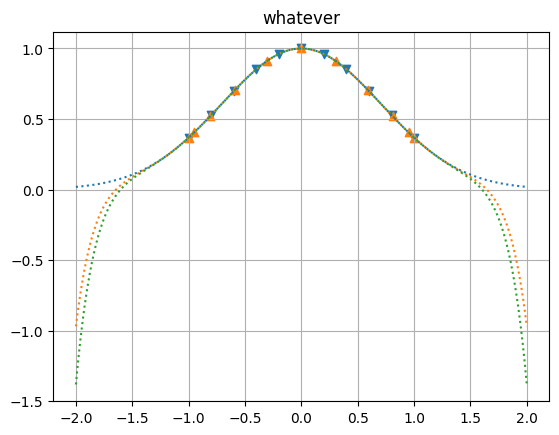

In [ ]:
x_wider = [-2,2] # to show beyond interval used for fit
h = 0.01 # increment size for change in x
xs_moar = np.arange(x_wider[0],x_wider[1]+h/2,h)

# f(x)
ys_moar = f(xs_moar) # evaluate system = "true" values

# p(x), chebyshev
c_che = np.array(list(p_che)) # get coeffs
ps_che = npp.chebyshev.chebval(xs_moar,c_che) # evaluate

# px(x), std monomial
ps_std = npp.polynomial.Polynomial(p_std.coef[::-1])(xs_moar) # evaluate

# plot, set data
plt.scatter(xs_esp,ys_esp,c="C0",marker="v",label="sample, even") # constrasting marker
plt.plot(xs_moar,ys_moar,c="C0",linestyle=":",label="f(x)")
plt.scatter(xs_rts,ys_rts,c="C1",marker="^",label="sample, cheb roots") # constrasting marker
plt.plot(xs_moar,ps_che,c="C1",linestyle=":",label="chebyshev")
plt.plot(xs_moar,ps_std,c="C2",linestyle=":",label="monomial")

# plot, set style
plt.grid()
plt.title("whatever")

# plot, show
plt.show()


### q3 (15 pts <font color=blue>MATH 685 ONLY</font>) cubic splines.

find the equations for the <b>natural</b> cubic spline that interpolates the data points: $(0,3),(1,5),(2,4),(3,1)$.
</br></br>

<font color=orange>+5 points extra credit if you plot the result</font>
</br>


### q4 (10 pts <font color=GREEN>MATH 385 ONLY</font>) bezier curve.

find the one-piece bezier curve $(x(t),y(t))$ defined by the given four points: $(0,0),(0,2),(2,0),(1,0)$.
</br></br>

<font color=orange>+5 points extra credit if you plot the result</font>
</br>
